In [5]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [6]:
df = pd.read_csv("C:/Users/msyu7/Desktop/detection/code/colonoscopy_data2.csv")

In [17]:
df.head()

,image_id,height,width,organ,lesion_label,location,shape_type_polygon,polygon_mask,bounding_box_shape,x_min,y_min,x_max,y_max,lesion
0,2_1_00001.png,2048,2048,colonoscopy,0,1,polygon,"1484.52,775.16;1516.82,710.56;1519.30,640.99;1...",rectangle,838.559006,149.068323,1519.304348,807.453416,ulcer
1,2_1_00001.png,2048,2048,colonoscopy,0,1,polygon,"1663.40,1478.26;1653.47,1426.09;1616.20,1388.8...",rectangle,1310.608696,1324.223602,1663.403727,1868.322981,ulcer
2,2_1_00002.png,2048,2048,colonoscopy,0,1,polygon,"687.01,223.60;687.01,273.29;704.40,337.89;726....",rectangle,687.006211,168.944099,1591.354037,1465.838509,ulcer
3,2_1_00002.png,2048,2048,colonoscopy,0,1,polygon,"826.14,1200.00;878.31,1207.45;932.97,1187.58;9...",rectangle,488.248447,434.782609,1007.503106,1207.453416,ulcer
4,2_1_00002.png,2048,2048,colonoscopy,0,1,polygon,"575.20,1038.51;520.55,1050.93;468.37,1050.93;4...",rectangle,212.472050,725.465839,607.503106,1050.931677,ulcer


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image_id            2496 non-null   object 
 1   height              2496 non-null   int64  
 2   width               2496 non-null   int64  
 3   organ               2496 non-null   object 
 4   lesion_label        2496 non-null   int64  
 5   location            2496 non-null   int64  
 6   shape_type_polygon  2496 non-null   object 
 7   polygon_mask        2496 non-null   object 
 8   bounding_box_shape  2496 non-null   object 
 9   x_min               2496 non-null   float64
 10  y_min               2496 non-null   float64
 11  x_max               2496 non-null   float64
 12  y_max               2496 non-null   float64
 13  lesion              2496 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 273.1+ KB


In [35]:
# number of image with lesion - 2000개 중에서
df['image_id'].nunique()

1996

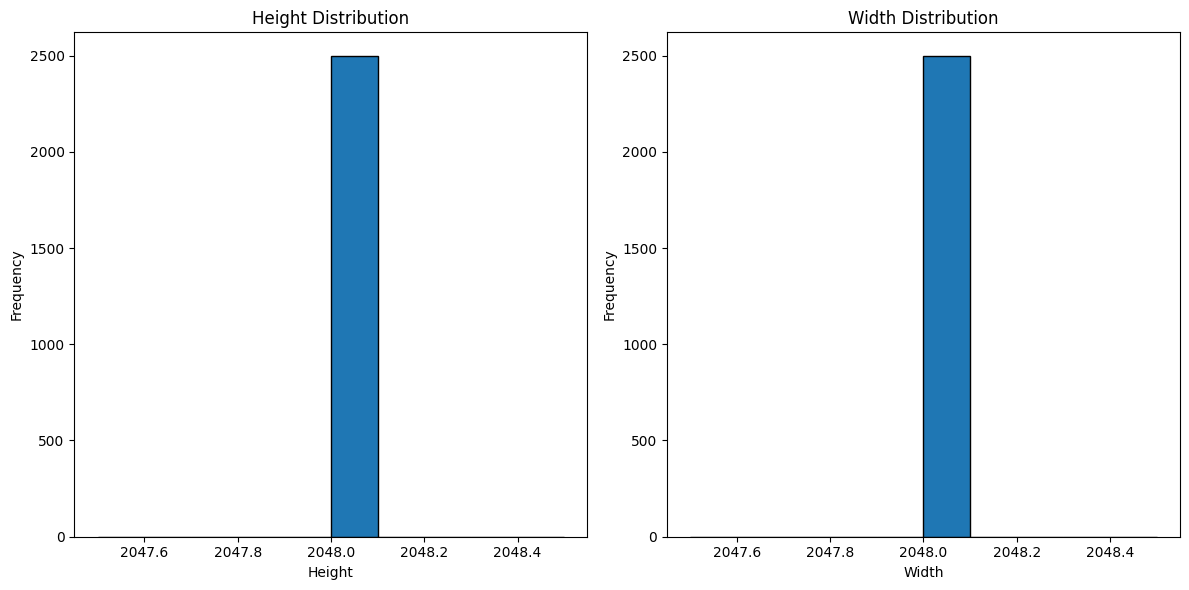

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.hist(df['height'], edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['width'], edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [18]:
shape_type_counts = df['shape_type_polygon'].value_counts()
bounding_box_counts = df['bounding_box_shape'].value_counts()

print(shape_type_counts)
print(bounding_box_counts)

shape_type_polygon
polygon    2496
Name: count, dtype: int64
bounding_box_shape
rectangle    2496
Name: count, dtype: int64


In [16]:
# number of each lesion
print('Colonoscopy ulcer: ', (df['lesion'] == 'ulcer').sum())
print('Colonoscopy polyp:', (df['lesion'] == 'polyp').sum())
print('Colonoscopy cancer: ', (df['lesion'] == 'cancer').sum())


Colonoscopy ulcer:  943
Colonoscopy polyp: 553
Colonoscopy cancer:  1000


#### Cancer

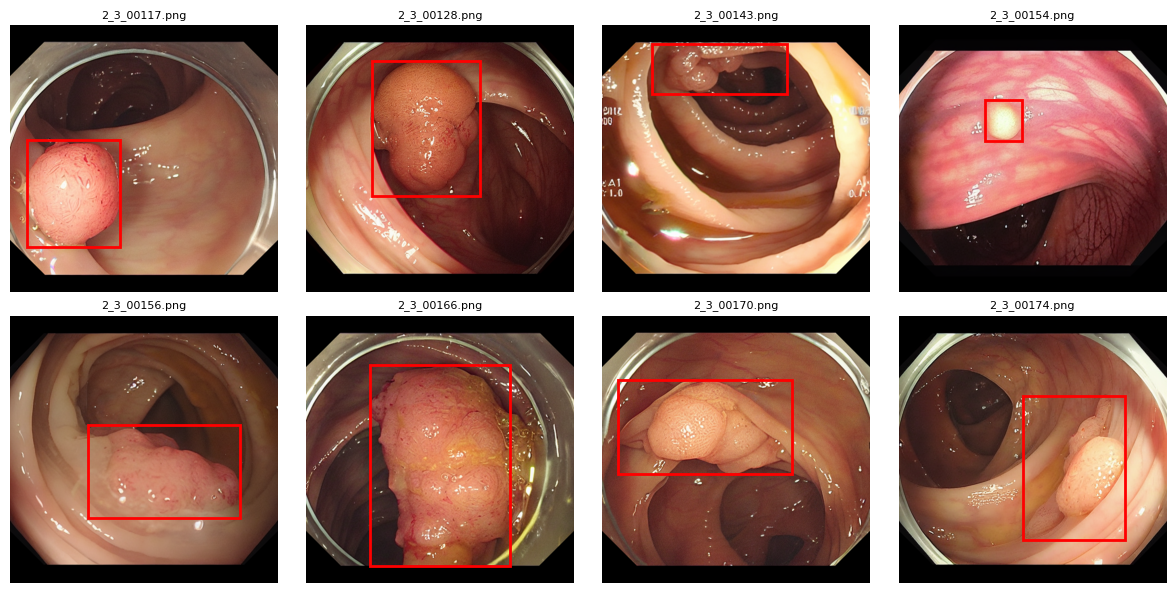

In [7]:
from PIL import Image
from matplotlib.patches import Rectangle

path_file = "C:/Users/msyu7/Desktop/detection/대장"
plt.figure(figsize=(12, 6))

cancer = df[df['lesion'] == 'cancer']
image_id = cancer.image_id.unique()

def draw_bbox(ax, img, box):
    x_min, y_min, x_max, y_max = box
    rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                     linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.imshow(img)

for i in range(8):
    records = df[df['image_id'] == image_id[i]]
    path = os.path.join(path_file, records.iloc[0]['lesion'], records.iloc[0]['image_id'])

    img = Image.open(path)
    img = np.array(img)
    boxes = records[['x_min', 'y_min', 'x_max', 'y_max']].values

    ax = plt.subplot(2, 4, i + 1)
    plt.title(f'{image_id[i]}', size=8)

    for box in boxes:
        draw_bbox(ax, img, list(np.int_(box)))

    ax.imshow(img)
    ax.axis('off')
    
plt.tight_layout()
plt.show()


#### Polyp

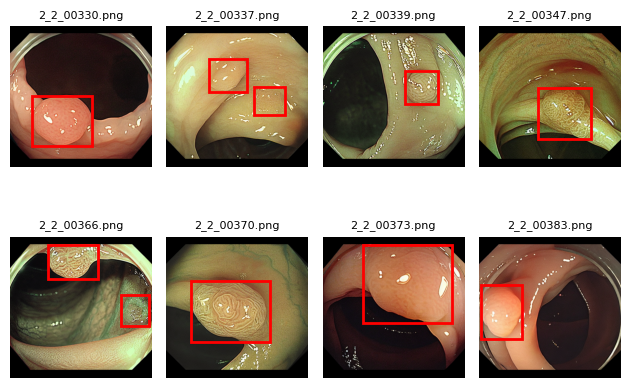

In [ ]:
polyp = df[df['lesion'] == 'polyp']
image_id = polyp.image_id.unique()

def draw_bbox(ax, img, box):
    x_min, y_min, x_max, y_max = box
    rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                     linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.imshow(img)

for i in range(8):
    records = df[df['image_id'] == image_id[i]]
    path = os.path.join(path_file, records.iloc[0]['lesion'], records.iloc[0]['image_id'])

    img = Image.open(path)
    img = np.array(img)
    boxes = records[['x_min', 'y_min', 'x_max', 'y_max']].values

    ax = plt.subplot(2, 4, i + 1)
    plt.title(f'{image_id[i]}', size=8)

    for box in boxes:
        draw_bbox(ax, img, list(np.int_(box)))

    ax.imshow(img)
    ax.axis('off')
    
plt.tight_layout()
plt.show()


#### ulcer

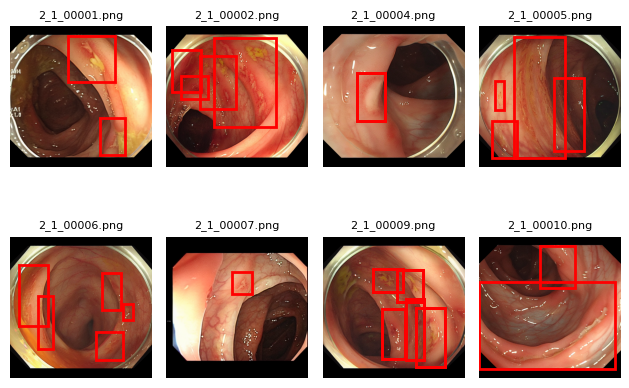

In [ ]:
ulcer = df[df['lesion'] == 'ulcer']
image_id = ulcer.image_id.unique()

def draw_bbox(ax, img, box):
    x_min, y_min, x_max, y_max = box
    rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                     linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.imshow(img)

for i in range(8):
    records = df[df['image_id'] == image_id[i]]
    path = os.path.join(path_file, records.iloc[0]['lesion'], records.iloc[0]['image_id'])

    img = Image.open(path)
    img = np.array(img)
    boxes = records[['x_min', 'y_min', 'x_max', 'y_max']].values

    ax = plt.subplot(2, 4, i + 1)
    plt.title(f'{image_id[i]}', size=8)

    for box in boxes:
        draw_bbox(ax, img, list(np.int_(box)))

    ax.imshow(img)
    ax.axis('off')
    
plt.tight_layout()
plt.show()


#### Colonoscopy Boundary Box description

C:\Users\msyu7\AppData\Local\Temp\ipykernel_20668\298465365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['box_width'] = df1['x_max'] - df1['x_min']
C:\Users\msyu7\AppData\Local\Temp\ipykernel_20668\298465365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['box_height'] = df1['y_max'] - df1['y_min']


         box_width   box_height
count   943.000000   943.000000
mean    677.159184   757.345806
std     393.698020   428.778855
min     117.021277    26.120219
25%     369.363669   419.832704
50%     577.297298   660.317461
75%     901.612903  1010.256729
max    2044.000000  1808.000000


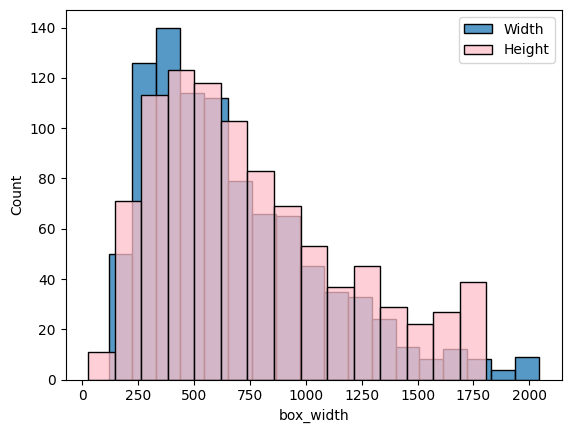

In [ ]:
#ulcer
df1 = df[df['lesion']=='ulcer']
df1['box_width'] = df1['x_max'] - df1['x_min']
df1['box_height'] = df1['y_max'] - df1['y_min']

print(df1[['box_width', 'box_height']].describe())
sns.histplot(df1['box_width'], label='Width')
sns.histplot(df1['box_height'], color='pink', label='Height')
plt.legend()
plt.show()

C:\Users\msyu7\AppData\Local\Temp\ipykernel_20668\3922707213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['box_width'] = df1['x_max'] - df1['x_min']
C:\Users\msyu7\AppData\Local\Temp\ipykernel_20668\3922707213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['box_height'] = df1['y_max'] - df1['y_min']


         box_width   box_height
count   553.000000   553.000000
mean    640.085931   565.342985
std     372.516629   313.179767
min      85.355649    89.567430
25%     377.379089   333.333334
50%     561.702128   502.928870
75%     806.382978   721.276596
max    1972.860215  1808.000000


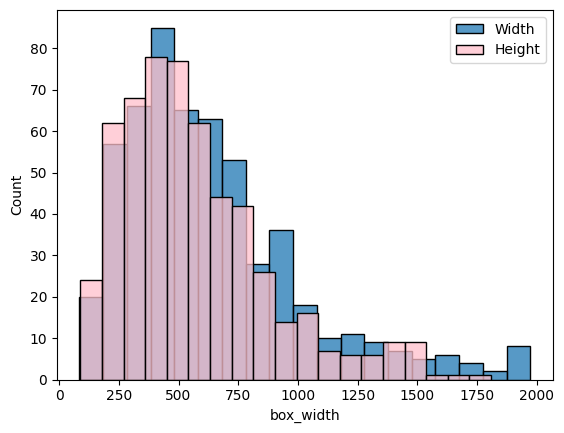

In [44]:
#polyp
df1 = df[df['lesion']=='polyp']
df1['box_width'] = df1['x_max'] - df1['x_min']
df1['box_height'] = df1['y_max'] - df1['y_min']

print(df1[['box_width', 'box_height']].describe())
sns.histplot(df1['box_width'], label='Width')
sns.histplot(df1['box_height'], color='pink', label='Height')
plt.legend()
plt.show()

         box_width   box_height
count  1000.000000  1000.000000
mean    706.387761   671.210905
std     346.328632   343.534967
min      80.898876    72.392638
25%     462.365591   415.596838
50%     637.749875   602.150537
75%     875.340502   847.849462
max    2048.000000  1808.000000


C:\Users\msyu7\AppData\Local\Temp\ipykernel_33872\1464332388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['box_width'] = df2['x_max'] - df2['x_min']
C:\Users\msyu7\AppData\Local\Temp\ipykernel_33872\1464332388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['box_height'] = df2['y_max'] - df2['y_min']


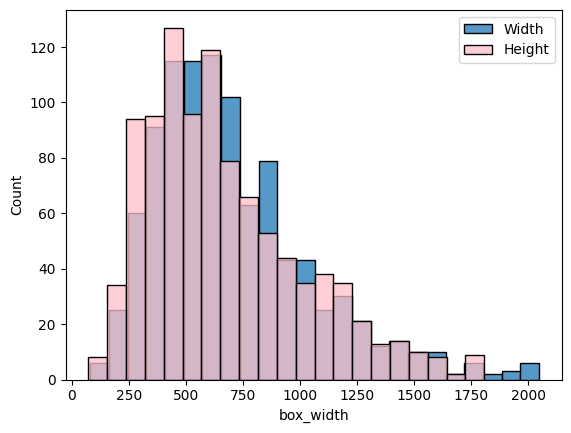

In [21]:
#cancer
df2 = df[df['lesion']=='cancer']
df2['box_width'] = df2['x_max'] - df2['x_min']
df2['box_height'] = df2['y_max'] - df2['y_min']

print(df2[['box_width', 'box_height']].describe())
sns.histplot(df2['box_width'], label='Width')
sns.histplot(df2['box_height'], color='pink', label='Height')
plt.legend()
plt.show()

         box_width   box_height
count  1000.000000  1000.000000
mean    706.387761   671.210905
std     346.328632   343.534967
min      80.898876    72.392638
25%     462.365591   415.596838
50%     637.749875   602.150537
75%     875.340502   847.849462
max    2048.000000  1808.000000


C:\Users\msyu7\AppData\Local\Temp\ipykernel_33872\3184553258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['box_width'] = df3['x_max'] - df3['x_min']
C:\Users\msyu7\AppData\Local\Temp\ipykernel_33872\3184553258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['box_height'] = df3['y_max'] - df3['y_min']


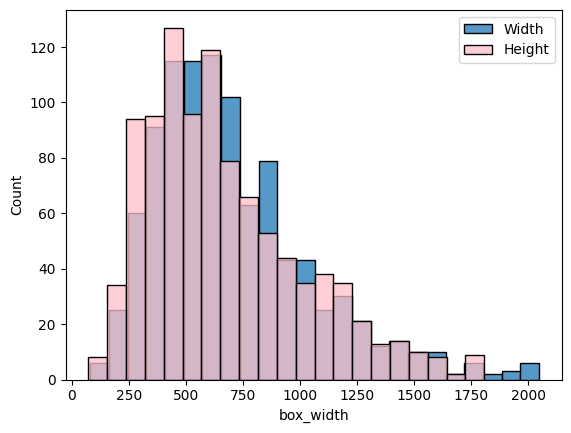

In [22]:
#cancer
df3 = df[df['lesion']=='cancer']
df3['box_width'] = df3['x_max'] - df3['x_min']
df3['box_height'] = df3['y_max'] - df3['y_min']

print(df3[['box_width', 'box_height']].describe())
sns.histplot(df3['box_width'], label='Width')
sns.histplot(df3['box_height'], color='pink', label='Height')
plt.legend()
plt.show()

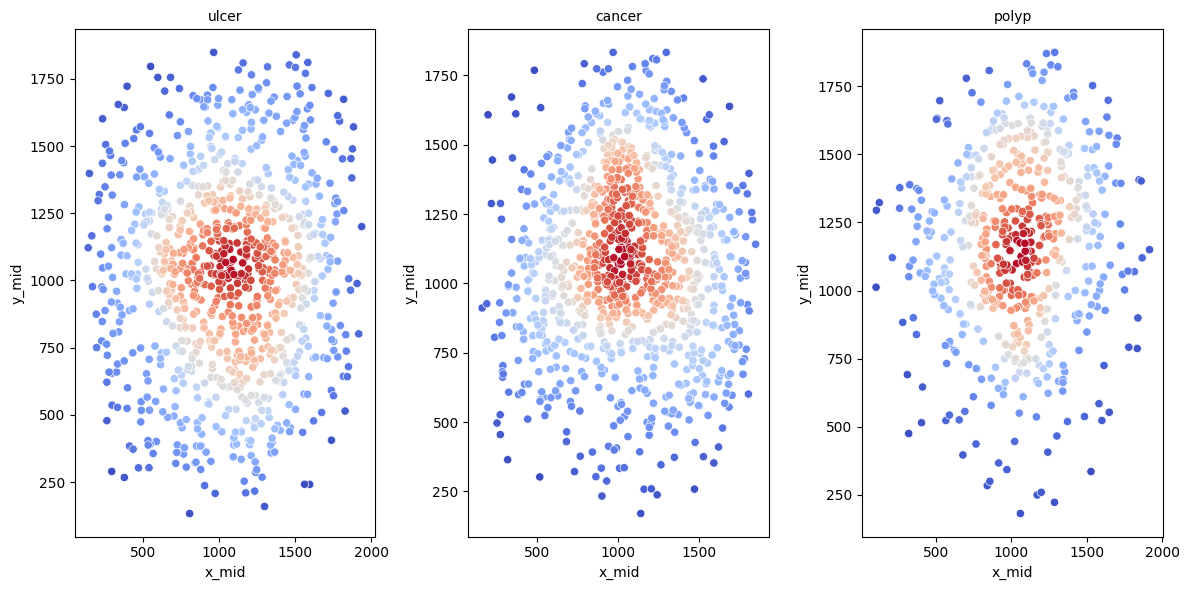

In [50]:
plt.figure(figsize=(12,6))
from scipy.stats import gaussian_kde

df['x_mid'] = (df['x_max'] + df['x_min']) / 2
df['y_mid'] = (df['y_max'] + df['y_min']) / 2

for i, label in enumerate(df['lesion'].unique()):
    plt.subplot(1,3,i+1)
    df2 = df[df['lesion'] == label]
    plt.title(label, size=10)
    xy = np.vstack([df2['x_mid'], df2['y_mid']])
    z = gaussian_kde(xy)(xy)
    sns.scatterplot(x=df2['x_mid'], y=df2['y_mid'], c=z, cmap='coolwarm')

plt.tight_layout()
plt.show()